
Normal(0,1):
  Original samples - Mean: 0.019, Std: 0.979
  Transformed samples - Mean: 0.503, Std: 0.285
  Expected for Uniform[0,1] - Mean: 0.500, Std: 0.289
  KS test for uniformity - p-value: 0.919663
  → Cannot reject uniformity (p > 0.05)

Exponential(1):
  Original samples - Mean: 1.008, Std: 1.002
  Transformed samples - Mean: 0.504, Std: 0.288
  Expected for Uniform[0,1] - Mean: 0.500, Std: 0.289
  KS test for uniformity - p-value: 0.621627
  → Cannot reject uniformity (p > 0.05)

Beta(2,5):
  Original samples - Mean: 0.288, Std: 0.159
  Transformed samples - Mean: 0.505, Std: 0.289
  Expected for Uniform[0,1] - Mean: 0.500, Std: 0.289
  KS test for uniformity - p-value: 0.720243
  → Cannot reject uniformity (p > 0.05)


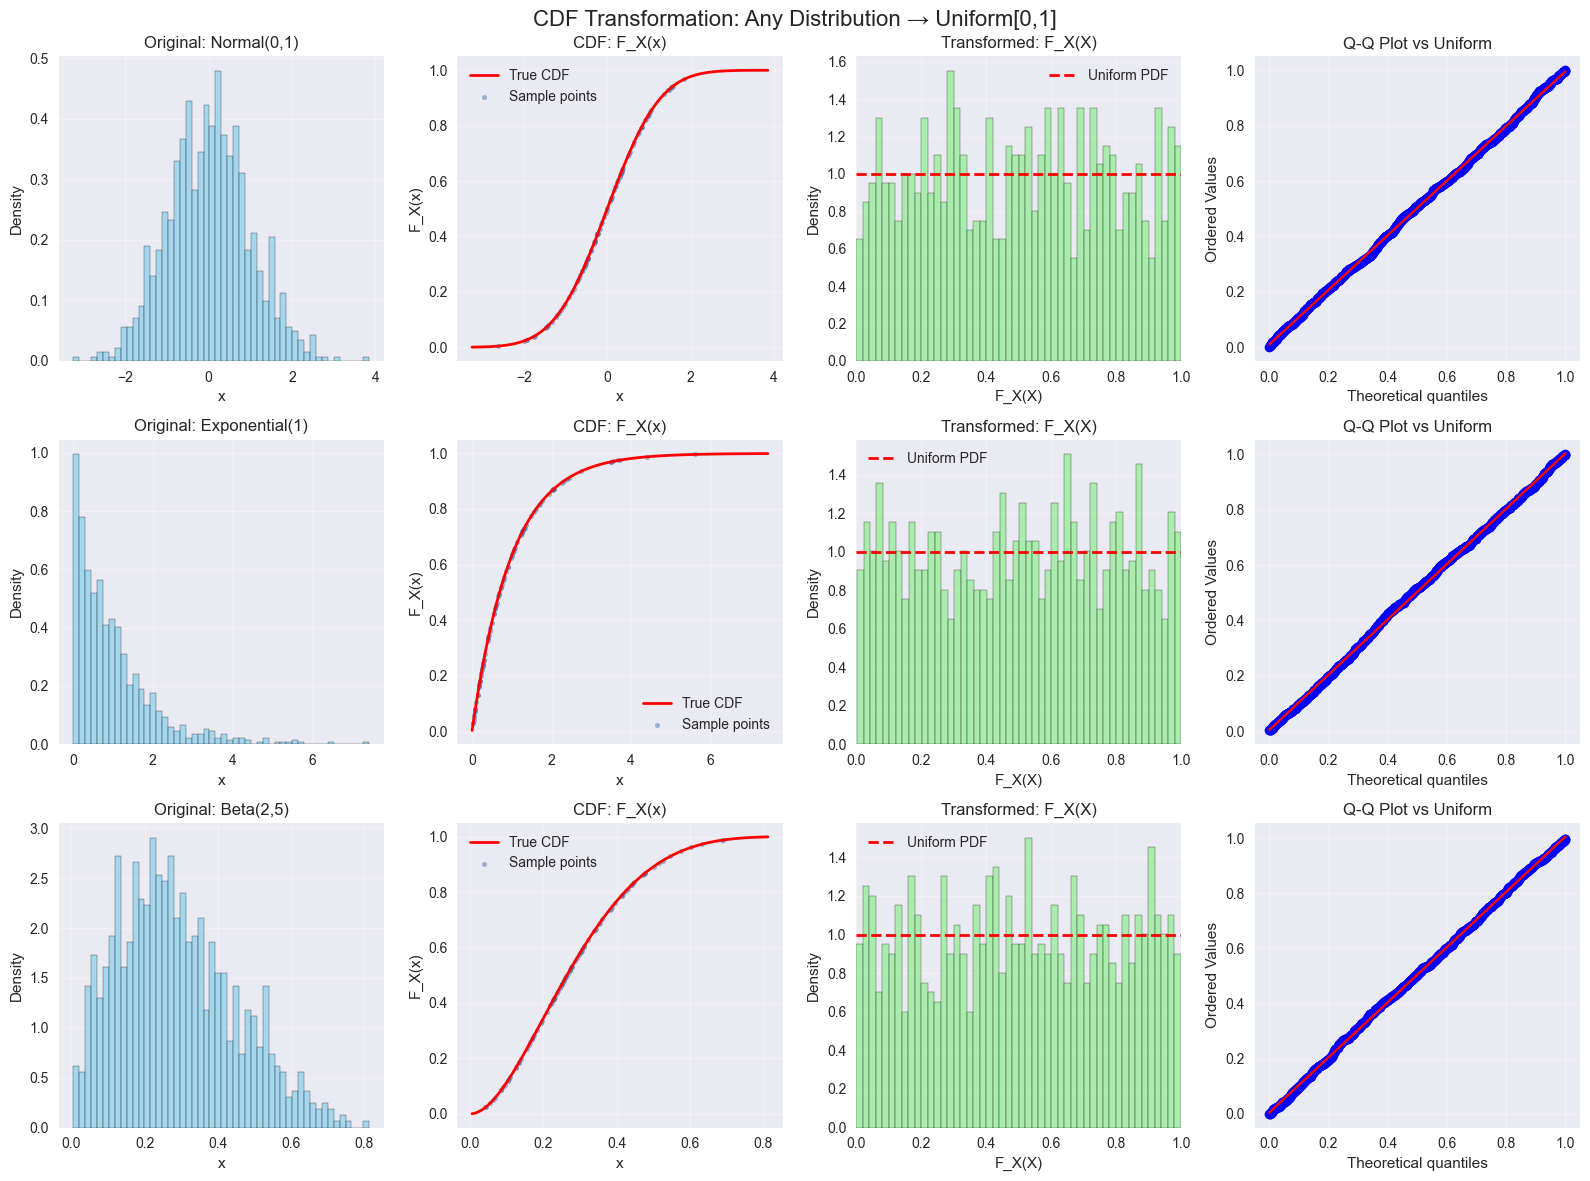


STEP-BY-STEP EXAMPLE
Exponential(λ=1) Distribution:
PDF: f(x) = e^(-x)
CDF: F(x) = 1 - e^(-x)

Step-by-step transformation:
Sample (X) → CDF(X) = F_X(X)
-----------------------------------
X_1 = 1.192 → F_X(1.192) = 1 - e^(-1.192) = 0.696
X_2 = 0.337 → F_X(0.337) = 1 - e^(-0.337) = 0.286
X_3 = 0.257 → F_X(0.257) = 1 - e^(-0.257) = 0.227
X_4 = 0.801 → F_X(0.801) = 1 - e^(-0.801) = 0.551
X_5 = 1.271 → F_X(1.271) = 1 - e^(-1.271) = 0.719

All CDF values should be approximately uniformly distributed on [0,1]

PRACTICAL CODE IMPLEMENTATION

# Step 1: Generate samples from any continuous distribution
from scipy import stats
import numpy as np

# Example with normal distribution
dist = stats.norm(loc=0, scale=1)  # Standard normal
samples = dist.rvs(size=1000)  # 1000 samples

# Step 2: Apply CDF to each sample
uniform_samples = dist.cdf(samples)

# Step 3: Verify uniformity
print("Original samples range:", samples.min(), "to", samples.max())
print("Transformed samples range:", uniform_sampl

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)

def demonstrate_cdf_uniform_transformation():
    """
    Demonstrates that applying CDF to any continuous distribution 
    results in uniform distribution on [0,1]
    """
    
    # Number of samples
    n_samples = 1000
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 4, figsize=(16, 12))
    fig.suptitle('CDF Transformation: Any Distribution → Uniform[0,1]', fontsize=16)
    
    # Test different distributions
    distributions = [
        ('Normal(0,1)', stats.norm(0, 1)),
        ('Exponential(1)', stats.expon(scale=1)),
        ('Beta(2,5)', stats.beta(2, 5))
    ]
    
    for i, (name, dist) in enumerate(distributions):
        # Generate samples from the distribution
        samples = dist.rvs(size=n_samples)
        
        # Apply CDF to each sample
        uniform_samples = dist.cdf(samples)
        
        # Plot original distribution
        ax1 = axes[i, 0]
        ax1.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
        ax1.set_title(f'Original: {name}')
        ax1.set_xlabel('x')
        ax1.set_ylabel('Density')
        ax1.grid(True, alpha=0.3)
        
        # Plot CDF of original distribution
        ax2 = axes[i, 1]
        x_range = np.linspace(samples.min(), samples.max(), 100)
        cdf_values = dist.cdf(x_range)
        ax2.plot(x_range, cdf_values, 'r-', linewidth=2, label='True CDF')
        ax2.scatter(samples[:100], uniform_samples[:100], alpha=0.5, s=10, label='Sample points')
        ax2.set_title(f'CDF: F_X(x)')
        ax2.set_xlabel('x')
        ax2.set_ylabel('F_X(x)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # Plot transformed (uniform) samples
        ax3 = axes[i, 2]
        ax3.hist(uniform_samples, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
        ax3.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Uniform PDF')
        ax3.set_title(f'Transformed: F_X(X)')
        ax3.set_xlabel('F_X(X)')
        ax3.set_ylabel('Density')
        ax3.set_xlim(0, 1)
        ax3.legend()
        ax3.grid(True, alpha=0.3)
        
        # Q-Q plot to verify uniformity
        ax4 = axes[i, 3]
        stats.probplot(uniform_samples, dist=stats.uniform, plot=ax4)
        ax4.set_title('Q-Q Plot vs Uniform')
        ax4.grid(True, alpha=0.3)
        
        # Print some statistics
        print(f"\n{name}:")
        print(f"  Original samples - Mean: {np.mean(samples):.3f}, Std: {np.std(samples):.3f}")
        print(f"  Transformed samples - Mean: {np.mean(uniform_samples):.3f}, Std: {np.std(uniform_samples):.3f}")
        print(f"  Expected for Uniform[0,1] - Mean: 0.500, Std: 0.289")
        
        # Kolmogorov-Smirnov test for uniformity
        ks_stat, p_value = stats.kstest(uniform_samples, 'uniform')
        print(f"  KS test for uniformity - p-value: {p_value:.6f}")
        if p_value > 0.05:
            print(f"  → Cannot reject uniformity (p > 0.05)")
        else:
            print(f"  → Reject uniformity (p ≤ 0.05)")
    
    plt.tight_layout()
    plt.show()

def step_by_step_example():
    """
    Shows step-by-step transformation for a few sample points
    """
    print("\n" + "="*60)
    print("STEP-BY-STEP EXAMPLE")
    print("="*60)
    
    # Use exponential distribution for clarity
    dist = stats.expon(scale=1)  # λ = 1
    
    # Generate a few samples
    np.random.seed(123)
    samples = dist.rvs(size=5)
    
    print("Exponential(λ=1) Distribution:")
    print("PDF: f(x) = e^(-x)")
    print("CDF: F(x) = 1 - e^(-x)")
    print()
    
    print("Step-by-step transformation:")
    print("Sample (X) → CDF(X) = F_X(X)")
    print("-" * 35)
    
    for i, x in enumerate(samples):
        cdf_value = dist.cdf(x)
        print(f"X_{i+1} = {x:.3f} → F_X({x:.3f}) = 1 - e^(-{x:.3f}) = {cdf_value:.3f}")
    
    print()
    print("All CDF values should be approximately uniformly distributed on [0,1]")

def practical_code_example():
    """
    Shows the exact code structure for the transformation
    """
    print("\n" + "="*60)
    print("PRACTICAL CODE IMPLEMENTATION")
    print("="*60)
    
    code_example = '''
# Step 1: Generate samples from any continuous distribution
from scipy import stats
import numpy as np

# Example with normal distribution
dist = stats.norm(loc=0, scale=1)  # Standard normal
samples = dist.rvs(size=1000)  # 1000 samples

# Step 2: Apply CDF to each sample
uniform_samples = dist.cdf(samples)

# Step 3: Verify uniformity
print("Original samples range:", samples.min(), "to", samples.max())
print("Transformed samples range:", uniform_samples.min(), "to", uniform_samples.max())
print("Mean of transformed samples:", np.mean(uniform_samples))
print("Should be close to 0.5 for uniform distribution")

# Step 4: Statistical test for uniformity
from scipy.stats import kstest
ks_stat, p_value = kstest(uniform_samples, 'uniform')
print(f"KS test p-value: {p_value:.6f}")
'''
    
    print(code_example)
    
    # Actually run the example
    print("Running the example:")
    print("-" * 30)
    
    dist = stats.norm(loc=0, scale=1)
    samples = dist.rvs(size=1000, random_state=42)
    uniform_samples = dist.cdf(samples)
    
    print("Original samples range:", f"{samples.min():.3f}", "to", f"{samples.max():.3f}")
    print("Transformed samples range:", f"{uniform_samples.min():.3f}", "to", f"{uniform_samples.max():.3f}")
    print("Mean of transformed samples:", f"{np.mean(uniform_samples):.3f}")
    print("Should be close to 0.5 for uniform distribution")
    
    ks_stat, p_value = stats.kstest(uniform_samples, 'uniform')
    print(f"KS test p-value: {p_value:.6f}")
    
    if p_value > 0.05:
        print("✓ Cannot reject uniformity - transformation successful!")
    else:
        print("✗ Reject uniformity - something went wrong")

if __name__ == "__main__":
    # Run all demonstrations
    demonstrate_cdf_uniform_transformation()
    step_by_step_example()
    practical_code_example()